In [12]:
# This is the famous titanic survival prediction dataseta and my first data science project

# First I imported all the lybraries and data

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset ('titanic')

In [13]:
# Show first 10 rows of the dataset to get an idea about the data

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [14]:
# Number of columns and rows
titanic.shape

(891, 15)

In [15]:
# summary of  some basic statistics

titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

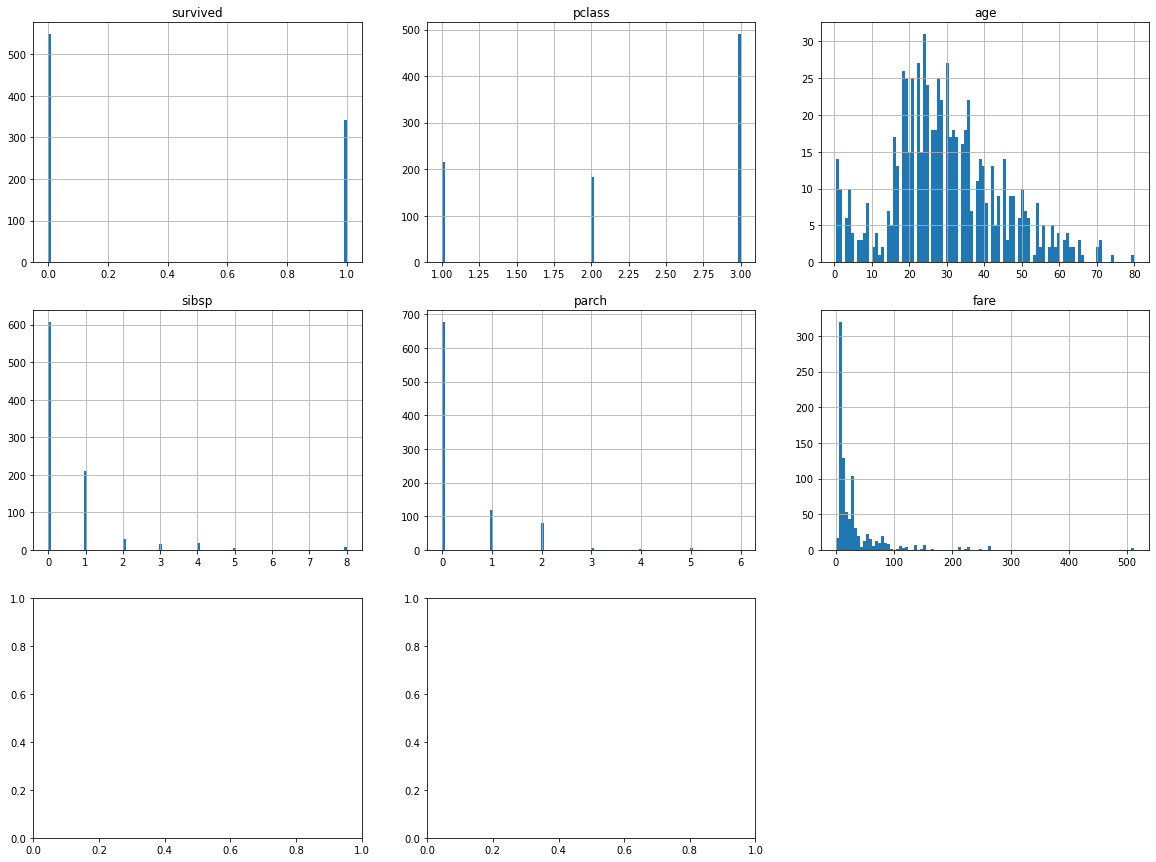

In [16]:
# first histograms of the data

titanic.hist(bins=100, figsize=(20,15))
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# histogram of survivors

titanic['survived'].value_counts()

In [ ]:
sns.countplot( titanic['survived'])

In [ ]:
# number of survived and deceased

titanic["survived"].hist()

In [ ]:
# comparison of survivors and deceased by various variables

cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r*n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
        
plt.tight_layout()

In [ ]:
# survival rate by sex

titanic.groupby('sex')[['survived']].mean()

In [ ]:
# survival rate by sex and class

titanic.pivot_table('survived', index='sex', columns='class')

In [ ]:
# survival rate by sex and class graph

titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

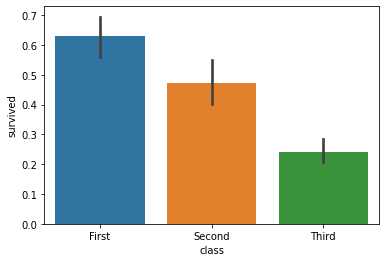

In [17]:
# survival rate of each class

sns.barplot(x='class', y='survived', data = titanic)

In [18]:
# pivot table of survival by sex, age and class

age = pd.cut(titanic['age'], [0, 20, 40, 60, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 20]   0.928571  1.000000  0.510638
       (20, 40]  0.977778  0.911111  0.478261
       (40, 60]  0.958333  0.846154  0.000000
       (60, 80]  1.000000       NaN  1.000000
male   (0, 20]   0.571429  0.526316  0.197368
       (20, 40]  0.500000  0.050847  0.143836
       (40, 60]  0.342105  0.055556  0.074074
       (60, 80]  0.083333  0.333333  0.000000

<AxesSubplot:xlabel='fare', ylabel='pclass'>

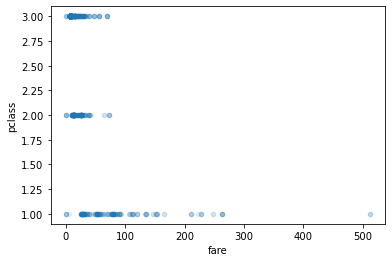

In [19]:
# plot of prices for each class

titanic.plot(kind="scatter", x="fare", y="pclass", alpha=0.1)

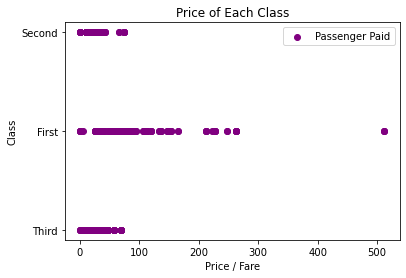

In [20]:
# plot of prices for each class in purple :)

plt.scatter(titanic['fare'], titanic['class'], color= 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

In [21]:
# count empty columns in each column

titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [22]:
# look all values in all columns and get a count for each

for val in titanic:
    print(titanic[val].value_counts())


0    549
1    342
Name: survived, dtype: int64
3    491
1    216
2    184
Name: pclass, dtype: int64
male      577
female    314
Name: sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64
S    644
C    168
Q     77
Name: embarked, dtype: int64
Third     491
First     216
Second    184
Name: class, dtype: int64
man      537
woman    271
child     83
Name: who, dtype: int64
True     537
False    354
Name: adult_male, dtype: int64
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: dec

In [23]:
# dropping the columns

titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

# remove rows with missing values

titanic = titanic.dropna( subset = ['embarked', 'age'])

In [24]:
# count number of rows and columns in the new dataset

titanic.shape

(712, 8)

In [25]:
# looking at data after removal of columns

titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [26]:
titanic = titanic.drop(['deck'], axis=1)

KeyError: "['deck'] not found in axis"

In [27]:
titanic.shape

(712, 8)

In [28]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


In [29]:
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:, 2] = labelencoder.fit_transform( titanic.iloc[:, 2].values)

titanic.iloc[:, 7] = labelencoder.fit_transform( titanic.iloc[:, 7].values)

In [31]:
titanic.dtypes

survived      int64
pclass        int64
sex           int32
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int32
dtype: object

In [32]:
print(titanic['sex'].unique)
print(titanic['embarked'].unique)

<bound method Series.unique of 0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: sex, Length: 712, dtype: int32>
<bound method Series.unique of 0      2
1      0
2      2
3      2
4      2
      ..
885    1
886    2
887    2
889    0
890    1
Name: embarked, Length: 712, dtype: int32>


In [33]:
# finally, we are splitting the data into x and y variables

x = titanic.iloc[:, 1:8].values
y = titanic.iloc[:, 0].values

In [34]:
# splitting the data into 80% training and 20% testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [35]:
# scaling the data to prepare them for machine learning models

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [36]:
# create a function with many machine learning models

def models(x_train, y_train):

# using logistic regression
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(x_train, y_train)
    
# using KNeighbors

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(x_train, y_train)

# using SVC (linear kernel)

    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state = 0)
    svc_lin.fit(x_train, y_train)
    
# using SVC RBF kernel

    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0 )
    svc_rbf.fit(x_train, y_train)

# Use GaussianNB

    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(x_train, y_train)

# decission tree

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(x_train, y_train)
    
# use random forest classifier

    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=0)
    forest.fit(x_train, y_train)
    
# print training accuracy for each model

    print('[0] Logistic Regression Training Accuracy: ', log.score(x_train, y_train))
    print('[1] K Neighbors Training Accuracy: ', knn.score(x_train, y_train))
    print('[2] SVC Linear Training Accuracy: ', svc_lin.score(x_train, y_train))
    print('[3] SVC RBF Training Accuracy: ', svc_rbf.score(x_train, y_train))
    print('[4] Gaussian NB Training Accuracy: ', gauss.score(x_train, y_train))
    print('[5] Decission Tree Training Accuracy: ', tree.score(x_train, y_train))
    print('[6] Random Forest Training Accuracy: ', forest.score(x_train, y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest    

In [37]:
# get and train all of the models

model = models(x_train, y_train)

[0] Logistic Regression Training Accuracy:  0.7978910369068541
[1] K Neighbors Training Accuracy:  0.8664323374340949
[2] SVC Linear Training Accuracy:  0.7768014059753954
[3] SVC RBF Training Accuracy:  0.8506151142355008
[4] Gaussian NB Training Accuracy:  0.8031634446397188
[5] Decission Tree Training Accuracy:  0.9929701230228472
[6] Random Forest Training Accuracy:  0.9753954305799648


In [38]:
# show the confusion matrix and accuracy for all of the models on the test data

from sklearn.metrics import confusion_matrix

for i in range( len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))
    
# extract true negative, false positive, false negative and true positive

    TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
    
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy = "0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy = "0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy = "0.8391608391608392"



In [39]:
# get feature importance of data columns

forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot:xlabel='feature'>

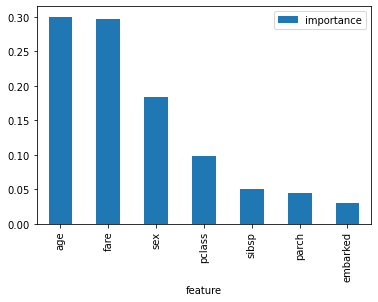

In [40]:
# visualize the importance

importances.plot.bar()

In [41]:
# print the prediction of random forest classifier

pred = model[6].predict(x_test)
print("predicted values", pred)

print()

#print the actual values

print("values from the data set", y_test)

predicted values [1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

values from the data set [0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [42]:
# prediction if I will survive based on very low standard meaning: cheap ticket, being young, ....

my_survival = [[3, 1, 21, 0, 0, 0, 1,]]

# scaling my survival to fit the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

# print prediction of my survival using random forest classifier

pred = model[6].predict(my_survival_scaled)
print(pred)

if pred==0:
    print("oh no! you didnt make it")
else:
    print("yay! you didnt die!")

[0]
oh no! you didnt make it


In [43]:
# prediction if i have best chances of surviving

my_survival_best = [[1, 0, 30, 1, 6, 1500, 0,]]

#scaling again my survival best to fit the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
my_survival_best_scaled = sc.fit_transform(my_survival)

# print prediction of my survival using random forest classifier

pred = model[6].predict(my_survival_scaled)
print(pred)

if pred==0:
    print("oh no, you didnt make it")
else:
    print("yay! you survived")
    

[0]
oh no, you didnt make it


In [49]:
# an addition, how to find price of tickets for people older than 30 

titanic[titanic.age>30, 'fare'].mean()

TypeError: '(0      False
1       True
2      False
3       True
4       True
       ...  
885     True
886    False
887    False
889    False
890     True
Name: age, Length: 712, dtype: bool, 'fare')' is an invalid key